In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin= dataset_url, cache_dir= ".", untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/483444865_65962cea07_m.jpg'),
 PosixPath('datasets/flower_photos/roses/22093190909_77223e6f53_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2535495431_e6f950443c.jpg'),
 PosixPath('datasets/flower_photos/roses/9355706808_a9a723a8e8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8241471746_5d81fdd3c0_n.jpg')]

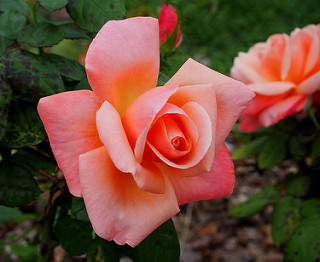

In [8]:
PIL.Image.open(str(roses[1]))

In [9]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [11]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/483444865_65962cea07_m.jpg'

In [12]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 180, 3)

In [13]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [14]:
x, y = [], []
for flower_name, images in flowers_images_dict.items():
  print(flower_name)
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

roses
daisy
dandelion
sunflowers
tulips


In [15]:
y[:5]

[0, 0, 0, 0, 0]

In [16]:
x = np.array(x)
y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [18]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [19]:
num_classes = 5

model = Sequential(
    [
        layers.Conv2D(16,3, padding = "same", activation = "relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(16,3, padding = "same", activation = "relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(16,3, padding = "same", activation = "relu"),
        layers.MaxPooling2D(),
     
        layers.Flatten(),
        layers.Dense(128,activation = "relu"),
        layers.Dense(5 )
    ]
)

In [21]:
model.compile(optimizer = "adam",
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #accuracy increased when logits true added
            metrics = ["accuracy"])

model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 65s 754ms/step - loss: 0.9459 - accuracy: 0.6341
Epoch 2/5
86/86 [==============================] - 65s 756ms/step - loss: 0.8049 - accuracy: 0.6973
Epoch 3/5
86/86 [==============================] - 65s 754ms/step - loss: 0.6506 - accuracy: 0.7605
Epoch 4/5
86/86 [==============================] - 65s 761ms/step - loss: 0.5526 - accuracy: 0.7932
Epoch 5/5
86/86 [==============================] - 66s 763ms/step - loss: 0.4032 - accuracy: 0.8601


In [22]:
model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 7s 225ms/step - loss: 1.1815 - accuracy: 0.6155


[1.1815472841262817, 0.6154683828353882]

In [23]:
predictions = model.predict(x_test_scaled)
predictions

29/29 [==============================] - 7s 243ms/step


array([[-0.49745524,  5.077825  ,  2.4005318 , -1.0755557 , -2.105853  ],
       [ 0.9399501 ,  0.4949728 ,  2.191643  , -2.406865  ,  0.12668276],
       [ 0.6005057 ,  2.0014753 ,  5.8903136 , -2.4519823 , -1.7637379 ],
       ...,
       [-0.9379024 , -3.6617308 ,  1.6067986 ,  5.733536  , -3.160795  ],
       [ 9.603582  , -1.9048699 , -6.7980027 ,  0.2994314 ,  8.651439  ],
       [-4.245174  , -5.936924  ,  1.4600968 ,  9.873255  , -0.8030075 ]],
      dtype=float32)

In [24]:
score = tf.nn.softmax(predictions[0])
score
np.argmax(score)

1

In [25]:
y_test[0]

1

In [26]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape =(180,180,3)
                                                 ),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),       
])

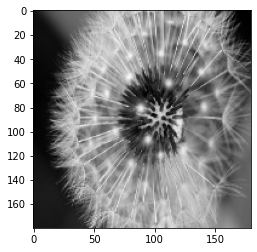

In [28]:
# data_augmentation(x/255)[0]
plt.imshow(x_train_scaled[0])

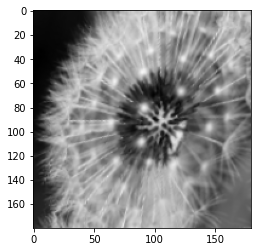

In [27]:
plt.imshow(data_augmentation(x_train_scaled)[0])

In [29]:
model = Sequential(
    [
        data_augmentation,
        layers.Conv2D(16,3, padding = "same", activation = "relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(16,3, padding = "same", activation = "relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(16,3, padding = "same", activation = "relu"),
        layers.MaxPooling2D(),
     
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128,activation = "relu"),
        layers.Dense(5 )
    ]
)

In [30]:
model.compile(optimizer = "adam",
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #accuracy increased when logits true added
            metrics = ["accuracy"])

model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 83s 944ms/step - loss: 1.2531 - accuracy: 0.4440
Epoch 2/5
86/86 [==============================] - 79s 914ms/step - loss: 1.0966 - accuracy: 0.5509
Epoch 3/5
86/86 [==============================] - 80s 932ms/step - loss: 0.9975 - accuracy: 0.6108
Epoch 4/5
86/86 [==============================] - 79s 923ms/step - loss: 0.9344 - accuracy: 0.6384
Epoch 5/5
86/86 [==============================] - 79s 924ms/step - loss: 0.8828 - accuracy: 0.6523


In [31]:
model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 7s 231ms/step - loss: 0.9851 - accuracy: 0.6209


[0.9850678443908691, 0.6209150552749634]

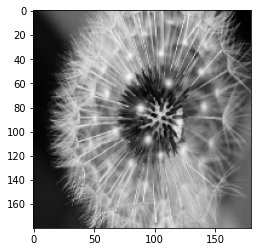

In [32]:
plt.imshow(x_train[0])